<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardiovascular Risk Prediction**

# **BUSINESS CONTEXT**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides, the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

The main cause of death worldwide, cardiovascular disease (CVD), has become a major public health problem due to the enormous socioeconomic burden it places on individuals, families, and nations every year. 1 Risk stratification can be used to identify individuals who are at a high risk of developing CVD by prediction models, and then treatments tailored to this target population, like lifestyle changes and the start of statin administration, can lower that risk and advance the primary prevention of CVD.

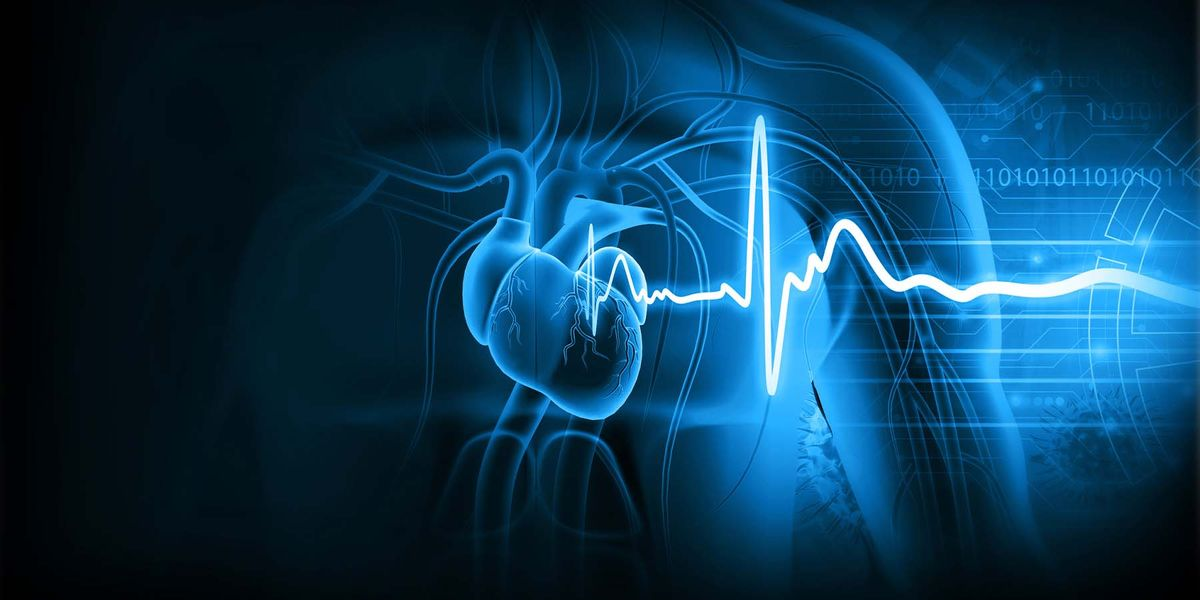

## **STEP 1 - Importing necessary libraries**

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **STEP 2 - Import and overview of the data**

In [60]:
# let's take a look at the dataset
crp_df = pd.read_csv('/content/drive/MyDrive/capstone project 3/Copy of data_cardiovascular_risk.csv')
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# **Column Details**


*   **Sex** - Gender of the patient
*   **Age** -  Age of the patient

*   **Is_smoking** - Whether the patient is smoking currently or not
*   **CigsPerDay** - Number of ciggrettes smoked per day

*   **BPMeds** - Whether patient is taking BP meds or not
*   **PrevalentStroke** - If the patient has a prior history of stroke

*   **PrevalentHyp** - If the patient has a history of hypertension
*   **Diabetes** - Patient has Diabetes or not

*   **TotChol** - Cholestrol Measure of patient
*   **SysBP** - Systolic blood pressure 

*   **DiaBP** - Diastolic blood pressure
*   **BMI** - Body mass index

*   **Heartrate** -  Heart beats per min
*   **Glucose** - Glucose level in body

*   **TenYearCHD** - 10 year risk of future coronary hear disease


















In [61]:
# Determining shape of the dataset
rows=crp_df.shape[0]
columns=crp_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 3390
Number of columns in dataset are 17


In [62]:
# Digging more into data
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [63]:
# More about numerical columns in our data
crp_df.describe().round(2).style.background_gradient()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.000000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.540000,1.970000,9.070000,0.030000,0.010000,0.320000,0.030000,237.070000,132.600000,82.880000,25.790000,75.980000,82.090000,0.150000
std,978.750000,8.590000,1.020000,11.880000,0.170000,0.080000,0.460000,0.160000,45.250000,22.290000,12.020000,4.120000,11.970000,24.240000,0.360000
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## **STEP 3 - Dealing with null values.**

In [64]:
# Defining function to determine null values in dataset and datatype of the data
def brief():
  values=pd.DataFrame(index=crp_df.columns)
  values['Null Count']= crp_df.isnull().sum()
  values['Dtype']=crp_df.dtypes
  values['unique_count']= crp_df.nunique()
  return values 

In [65]:
brief()

,Null Count,Dtype,unique_count
id,0,int64,3390
age,0,int64,39
education,87,float64,4
sex,0,object,2
is_smoking,0,object,2
cigsPerDay,22,float64,32
BPMeds,44,float64,2
prevalentStroke,0,int64,2
prevalentHyp,0,int64,2
diabetes,0,int64,2


### Inference - Education, cigs_per_day, BPmeds, totchol, BMI, heartrate, glucose have null values.

### As we have a very small dataset and we have a lot of null values, removing null value will remove a large chunk of data. Therefore we have to replace these null values.

### We will be using median of that column to replace null values because mean is affected by outliers but median is not affected by outliers.

In [66]:
# Replacing null values with median continuos data type 
crp_df['cigsPerDay'] = crp_df['cigsPerDay'].fillna(crp_df['cigsPerDay'].median())
crp_df['totChol'] = crp_df['totChol'].fillna(crp_df['totChol'].median())
crp_df['BMI'] = crp_df['BMI'].fillna(crp_df['BMI'].median())
crp_df['heartRate'] = crp_df['heartRate'].fillna(crp_df['heartRate'].median())
crp_df['glucose'] = crp_df['glucose'].fillna(crp_df['glucose'].median())

In [67]:
# Replacing null values with mode for 
crp_df['education'] = crp_df['education'].fillna(crp_df['education'].mode()[0])
crp_df['BPMeds'] = crp_df['BPMeds'].fillna(crp_df['BPMeds'].mode()[0])

In [68]:
# Lets check again for presence of null values
brief()

,Null Count,Dtype,unique_count
id,0,int64,3390
age,0,int64,39
education,0,float64,4
sex,0,object,2
is_smoking,0,object,2
cigsPerDay,0,float64,32
BPMeds,0,float64,2
prevalentStroke,0,int64,2
prevalentHyp,0,int64,2
diabetes,0,int64,2


### Finally we are free from null values.

# **STEP 4 - Outlier Removal**

In [69]:
# Box plot for visualizing outliers
# figure, ax = plt.subplots(nrows=4, ncols=2, figsize=(25,18))
# sns.boxplot(crp_df['age'], palette='Accent', ax=ax[0,0])
# sns.boxplot(crp_df['cigsPerDay'],palette='GnBu', ax=ax[0,1])
# sns.boxplot(crp_df['totChol'],palette='Dark2', ax=ax[1,0])
# sns.boxplot(crp_df['sysBP'], palette='OrRd',ax=ax[1,1])
# sns.boxplot(crp_df['diaBP'], palette='Pastel2_r', ax=ax[2,0])
# sns.boxplot(crp_df['BMI'],palette='Set1', ax=ax[2,1])
# sns.boxplot(crp_df['heartRate'], palette='YlGnBu_r', ax=ax[3,0])
# sns.boxplot(crp_df['glucose'],palette='autumn', ax=ax[3,1])

### Inference - As we can see that except Age column all other columns have a lot of outliers.

In [70]:
# # We will be using quantile method for dealing with outliers
# columns=['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
# crp_df[columns] = crp_df[columns].apply(lambda x: x.clip(*x.quantile([0.05, 0.95])))

In [71]:
# figure, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,10))
# sns.boxplot(crp_df['totChol'],palette='Dark2', ax=ax[0,0])
# sns.boxplot(crp_df['sysBP'], palette='OrRd',ax=ax[0,1])
# sns.boxplot(crp_df['diaBP'], palette='Pastel2_r', ax=ax[1,0])
# sns.boxplot(crp_df['BMI'],palette='Set1', ax=ax[1,1])
# sns.boxplot(crp_df['heartRate'], palette='YlGnBu_r', ax=ax[2,0])
# sns.boxplot(crp_df['glucose'],palette='autumn', ax=ax[2,1])

# **STEP 5 - Exploratory Analysis**

## **Univariate Analysis**

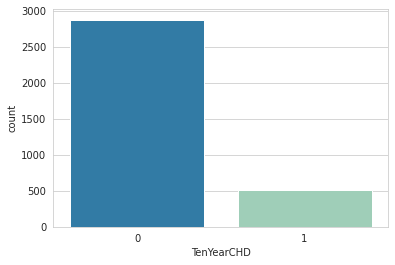

In [72]:
# target/dependent variable distribution
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', data=crp_df, palette='YlGnBu_r')

### Inference - The above distribution clearly shows that number of people having cardiovascular risk are very less.


In [73]:
# Histplots for BMI and Heartrate
# for col in columns:
#   fig= plt.subplots(figsize=(13,4))
#   sns.histplot(data=crp_df, x=col)

### Inference - BMI mainly ranges from 22 to 30 and heart rate ranges from 60 to 75

## **Bivariate Analysis**

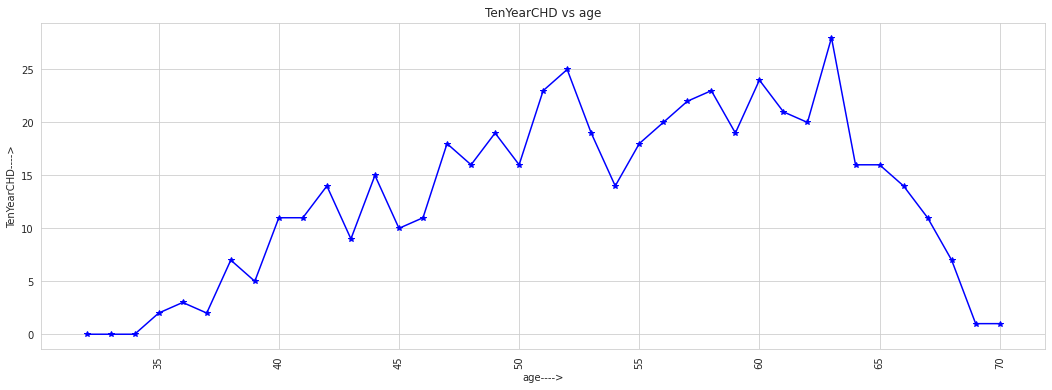

In [74]:
# Relatioship between age and risk 
x = crp_df.groupby('age')['TenYearCHD'].agg(np.sum)

plt.figure(figsize=(18,6))
plt.plot(x ,  color='blue', marker='*')
plt.xticks(rotation=90)
plt.xlabel('age---->')
plt.ylabel('TenYearCHD---->')
plt.title('TenYearCHD vs age')
plt.show()

### Inference - As we can observe with increasing age cardiovascular risk also increases, peak is observed between 60-65 years of age.

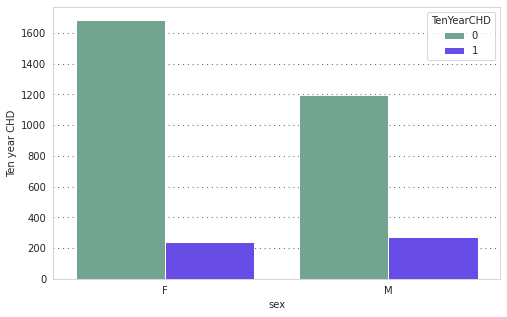

In [75]:
# Relationship between gender and CHD risk
fig = plt.figure(figsize=(8,5))
sns.countplot(data=crp_df,x='sex',palette=["#6aac90","#5833ff"], hue='TenYearCHD')
plt.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xlabel("sex")
plt.ylabel("Ten year CHD")
plt.show()


### Inference - Males are more prone to CHD.

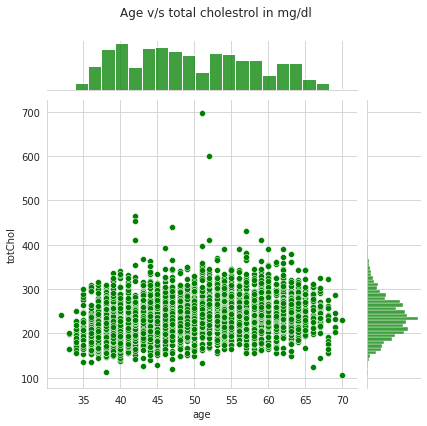

In [76]:
# Relationship between sge and cholestrol
p=sns.jointplot(x="age", y="totChol", data=crp_df, color="g")
plt.subplots_adjust(top=.9)
p.fig.suptitle('Age v/s total cholestrol in mg/dl') 
plt.show()

### Inference - The above graph shows that patients between the age group 40-60 have high cholestrol as compared to other age groups.

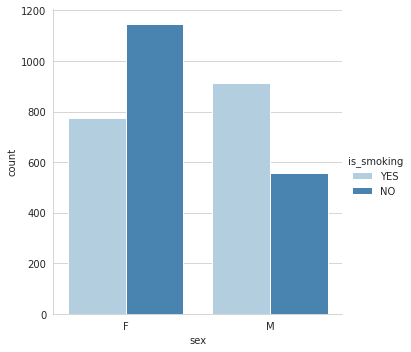

In [77]:
# Plot to check how many people smoke
sns.catplot(data=crp_df, kind='count', x='sex',hue='is_smoking', palette='Blues')
plt.show()

### Inference - As compared to females, males are more into smoking.

## **Multivariate Analysis**

In [78]:
# Multivariate analysis
# color=sns.set_palette('pastel')
# sns.pairplot(crp_df[columns], palette= color)

# **STEP 6 - Multicollinearity and correlation check**

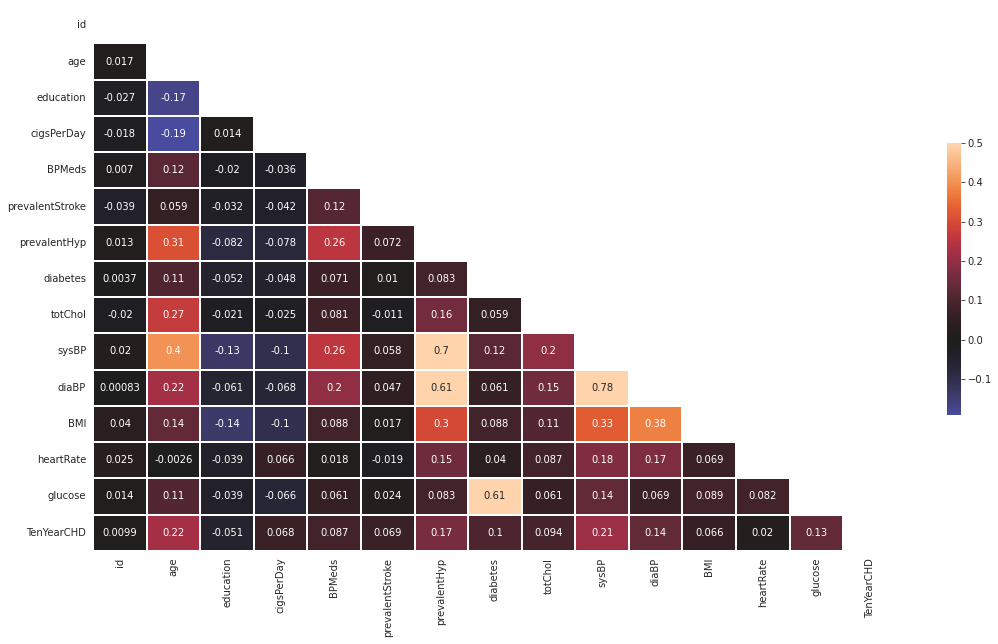

In [79]:
# Checking correlation of the data
corr=crp_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, mask=mask, vmax=.5, center=0, annot=True, linewidths=1.0, cbar_kws={"shrink": .5})

### Inference - Systolic BP, DiastolicBP and prevalent hypertension are highly correlated.

In [80]:
# Defining a function to calculate Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [81]:
# VIF calculation
calc_vif(crp_df[[i for i in crp_df.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,id,3.974289
1,age,41.100636
2,education,4.569065
3,cigsPerDay,1.626743
4,BPMeds,1.131543
5,prevalentStroke,1.028574
6,prevalentHyp,2.403210
7,diabetes,1.581828
8,totChol,30.622707
9,sysBP,133.507311


In [82]:
# Lets check our vif values again after removing highly correlated columns
calc_vif(crp_df[[i for i in crp_df.describe().columns if i not in ['TenYearCHD','totChol','heartRate','sysBP','glucose','BMI', 'diaBP']]])

,variables,VIF
0,id,3.769870
1,age,7.355777
2,education,3.978231
3,cigsPerDay,1.519104
4,BPMeds,1.117863
5,prevalentStroke,1.026652
6,prevalentHyp,1.683718
7,diabetes,1.044403


# **STEP 7 - Model Training**

## Instead of dropping irrelevant or collinear columns we will be creating a separate list containg only those variables that are important and are not collinear
### In our dataset systolicBP, diastolicBP, prevalent hypertension are correlated so we will not be considering systolicBP as it has high correaltion with the other two columns. Also, we will not be considering id  column as it has no relation with Coronary heart disease.

In [83]:
# Converting into dummy variables
crp_df=pd.get_dummies(crp_df, columns=['sex', 'is_smoking'])
crp_df.columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'sex_F', 'sex_M', 'is_smoking_NO',
       'is_smoking_YES'],
      dtype='object')

In [84]:
# Assigning all required independent variables in one variable 
features=['age', 'education','sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES', 'BPMeds', 'cigsPerDay', 'prevalentStroke',  'prevalentHyp',  'diabetes']
final_df= crp_df[features]

 It is obvious that the classes are unbalanced, which would cause the model to be more biassed in favour of the "0" class (people with no Risk of CHD). We must discover a method for training a model such that it may accept some risk and provide more results in the "1" class.

We need to create a model that can forecast the risk of CHD, which is the rationale behind that. The model need to be able to foretell the risk of heart disease if there is even a remote possibility, given the patient's health statistics.

However, in a real-world scenario, our model is more beneficial because it is extremely likely that such a model will be able to anticipate whether a patient is at danger. Certainly, this would cause our model to reach a lower accuracy score since it is taking more risks for "at risk" patients.

A typical technique would have improved our accuracy in this case due to the class imbalance, but in the real world, such a model isn't an acceptable answer because it's predicted that it will frequently fail to determine whether the patient is at risk, defeating the goal of the project.

Therefore, we are using SMOTETomek on the training set to address these imbalances. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a type of data augmentation for the minority class. The strategy works because it generates convincing new synthetic examples from the minority class that are substantially near in feature space to already existing examples from the minority class.

In [85]:
# Defining variables required
scaler = MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
columns = [i for i in crp_df.describe().columns if i not in ['TenYearCHD']]

# Splitting the data into train and test
x=final_df[features]
y=crp_df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split( x, y , test_size = 0.2, random_state = 0)

# Handling class imbalance by oversampling followed by removing the Tomek link
x_smote, y_smote = SMOTETomek(random_state=42).fit_resample(x_train, y_train)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')


Before Handling Class Imbalace:
0    2305
1     407
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    2287
1    2287
Name: TenYearCHD, dtype: int64 



Now that the class is balanced we will be evaluating training algorithms using different metrics, unlike regression problems we will be using different evaluation metrics for classification problems:


1.   Accuracy - (TP+TN)/(TP+FP+FN+TN)
2.   Recall - TP/(TP+FN)

1.   Precision - TP/(TP+FP)
2.   F1 Score - (2 * Precision * Recall)/(Precision + Recall)

As we know that we had a data set which was highly imbalanced, in such cases accuracy is a bad metric for evaluation as it might give false predictions in such cases f1 score is the best metric to be used as it takes the average of precision and recall and gives proper results.





In [86]:
# Defining a function to train the input model and print evaluation matrix
def model_analyser(model, x_train, x_test, y_train, y_test):

  '''Takes model, train and test sets as input and returns scores with their respective model plots'''

  # Fitting the model
  model.fit(x_train,y_train)

  # Feature importances
  try:
    try:
      imp = model.feature_importances_
      feature = columns
    except:
      importance = np.abs(model.coef_[0])
      feature = features
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    predict = model.predict(x)
    pred_probability = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=predict, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_probability)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='rainbow', linecolor='Black', linewidths=1.0)
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=predict), annot=True, cmap='Blues', linecolor='Black', linewidths=1.0)
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,4))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model


## **Model 1 - Logistic Regression**
### Data are categorised into discrete classes using logistic regression, which examines the relationship between one or more independent variables. It is frequently used in predictive modelling, where the model calculates the mathematical likelihood that a particular incident falls under a given category.

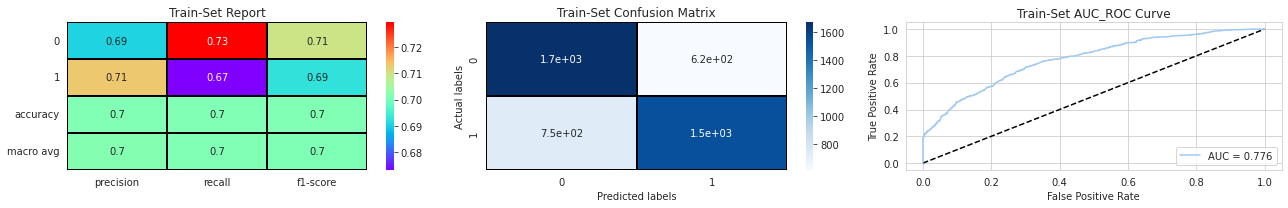

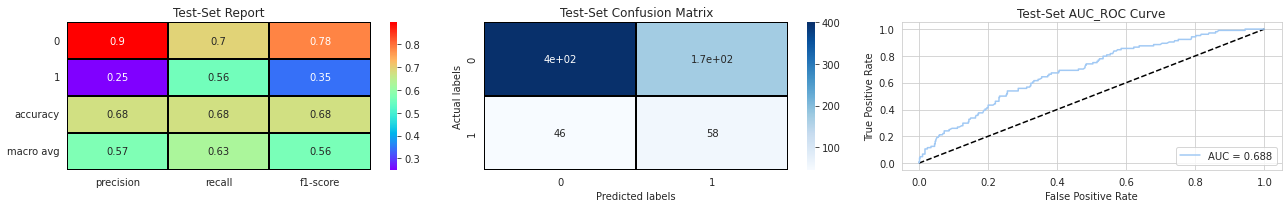

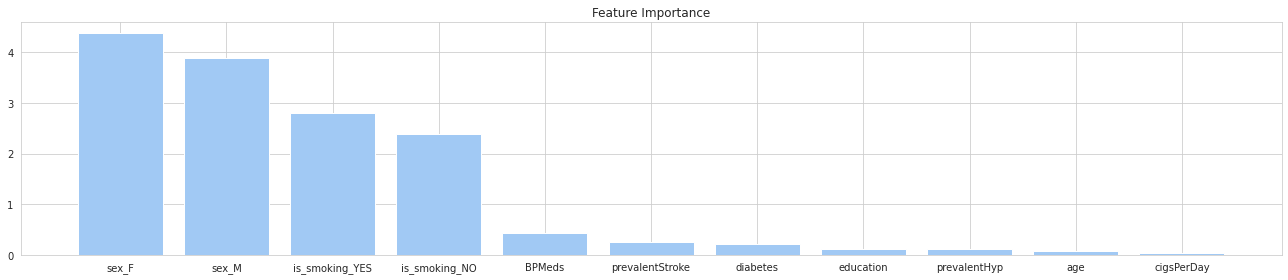

LogisticRegression(max_iter=10000)

In [87]:
# Using first model logistic regression
logreg = LogisticRegression(fit_intercept=True, max_iter=10000)
model_analyser(logreg, x_smote, x_test, y_smote, y_test)

### Inference - F1 score is pretty good (70%) and even accuracy is 70%

## **Model 2 - Naive Bayes Classifier**
### The Naive Bayes algorithm is a classification method built on the Bayes' Theorem, which presupposes that the features are independent. Simple to construct and especially helpful for very big data sets is the naive Bayes model. Along with being straightforward, Naive Bayes is known to perform better than even the most complex classification techniques.

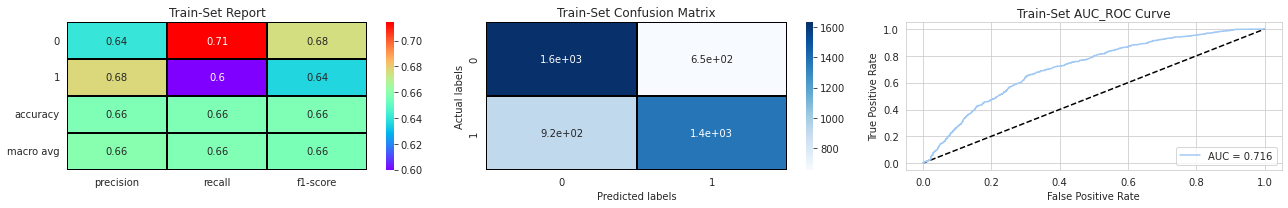

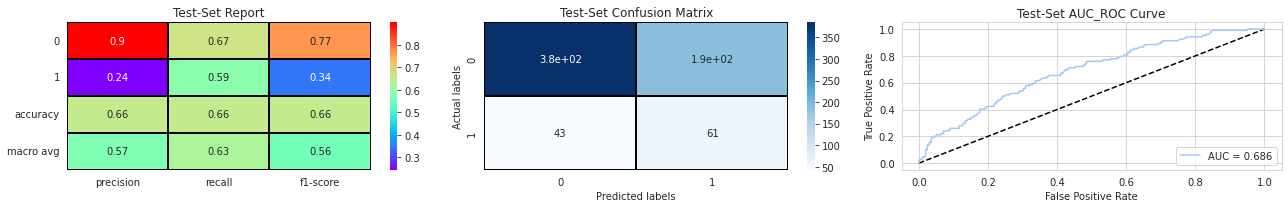

<Figure size 1296x288 with 0 Axes>

GaussianNB()

In [88]:
# Using Naive Bayes Classifier
naive_bayes = GaussianNB()
model_analyser(naive_bayes, x_smote, x_test, y_smote, y_test)

### Inference - Naive Bayes Classifier has low F1 Score and low accuracy which clearly shows this algorithm is not fit for training our model.

## **Model 3 - KNN Classifier**
### KNN, or K-Nearest Neighbors, is a straightforward technique used in machine learning to solve classification and regression problems. KNN is also non-parametric, which means the algorithm tries to learn any functional form from the training data rather than relying on strong assumptions.

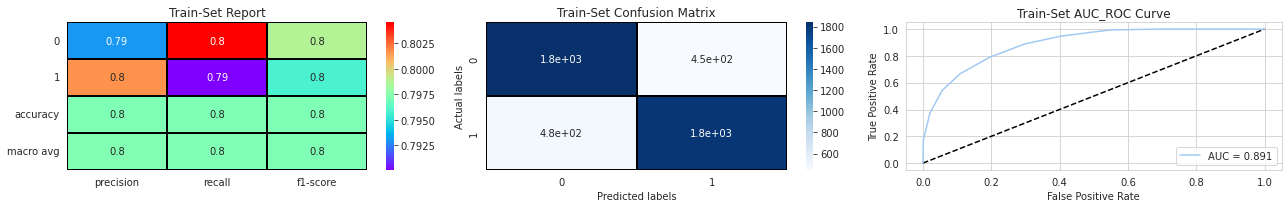

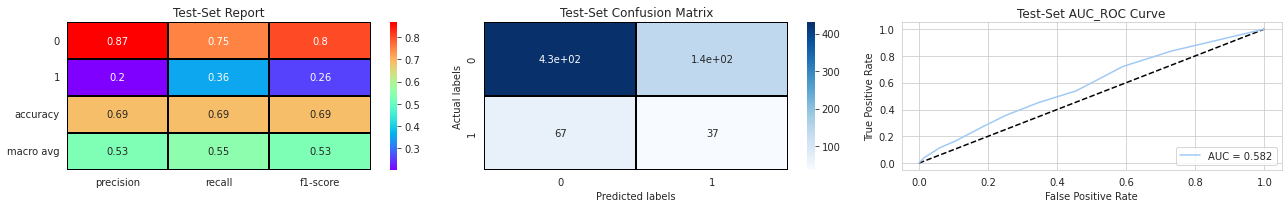

<Figure size 1296x288 with 0 Axes>

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [89]:
# Using K-Nearest Neighbours
classifier = KNeighborsClassifier()

# Hyperparameter Grid
grid = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knn = GridSearchCV(classifier, param_grid = grid, scoring = scoring, cv=5)
knn.fit(x_smote, y_smote)

# Analysing the model with best set of parametes
model_analyser(knn.best_estimator_, x_smote, x_test, y_smote, y_test)

### Inference - K-Nearest neighbour classifier has high F1 score and good accuracy score of 80%.

## **Model 4 - Support Vector Classifier**
### SVM is a potent supervised algorithm that excels on complex, yet tiny datasets. Although Support Vector Machine, often known as SVM, can be used for classification and regression tasks, they typically perform best in the latter.

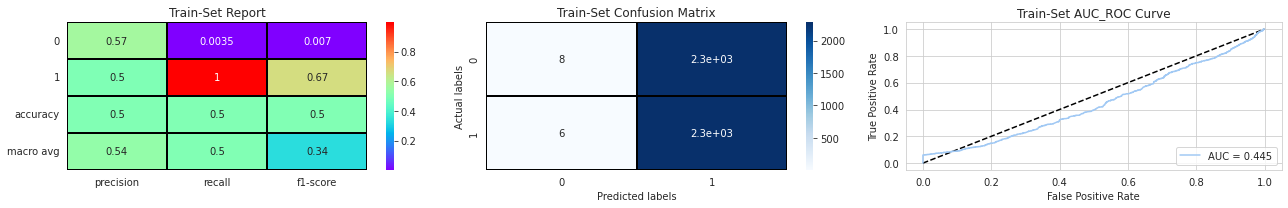

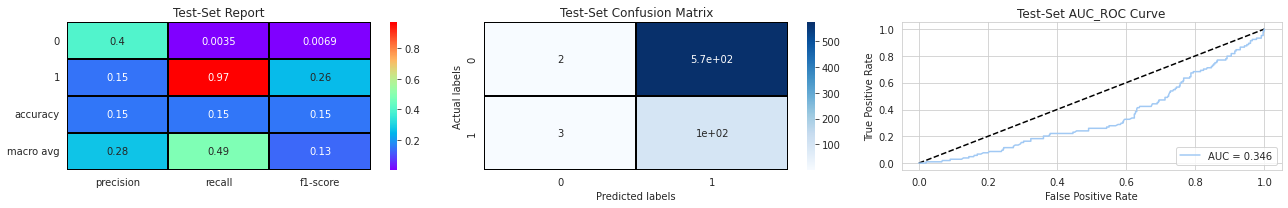

<Figure size 1296x288 with 0 Axes>

SVC(C=10, kernel='poly', max_iter=1000, probability=True, random_state=0)

In [90]:
# Using Support Vector Classifier
SVM_clf = SVC(random_state= 0,probability=True)

# Hyperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"],
        'C': [0.1, 1, 10, 100],
        'max_iter' : [1000]}

# GridSearch to find the best parameters
svc = GridSearchCV(SVM_clf, param_grid = grid, scoring = scoring, cv=5)
svc.fit(x_smote, y_smote)

# Analysing the model with best set of parametes
model_analyser(svc.best_estimator_, x_smote, x_test, y_smote, y_test)

### Inference - Support Vector Classifier has a very bad F1 score till now (47%), therefore this model cannot be used for training our model.


## **Model 5 - XG Boost Classifier**
### XGBoost is an implementation of Gradient Boosted decision trees. Decision trees are generated sequentially in this approach. Weights are significant in XGBoost. Each independent variable is given a weight before being fed into the decision tree that forecasts outcomes. Variables that the tree incorrectly predicted are given more weight before being placed into the second decision tree.

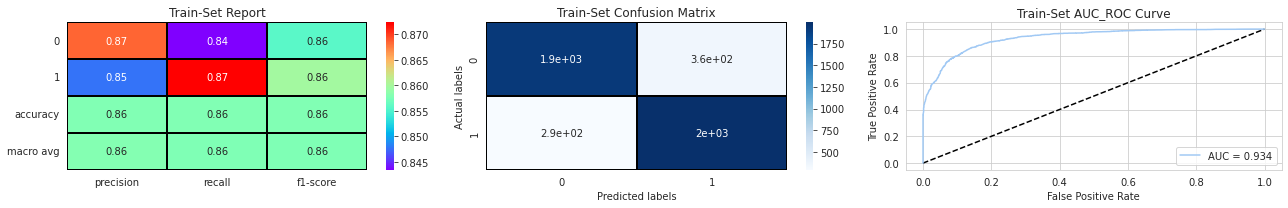

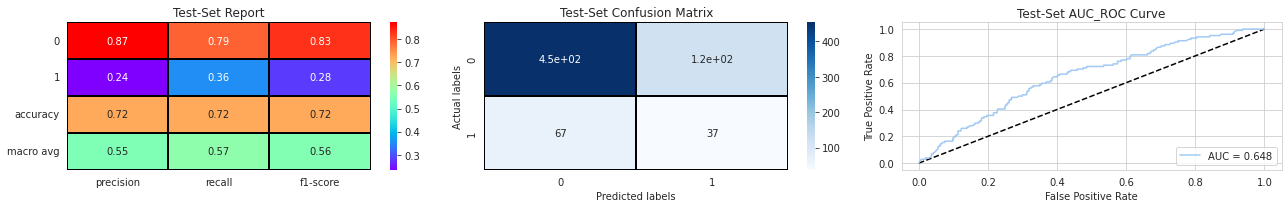

<Figure size 1296x288 with 0 Axes>

XGBRFClassifier(eta=0.05, max_depth=10, min_samples_leaf=30,
                min_samples_split=50, n_estimators=150, random_state=3,
                silent=True)

In [91]:
# Classifier
xgb_classifier = XGBRFClassifier(silent=True, random_state=3)

# Hyperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgboost = GridSearchCV(xgb_classifier, param_grid = grid, scoring = scoring, cv=5)
xgboost.fit(x_smote, y_smote)

# Analysing the model with best set of parametes
model_analyser(xgboost.best_estimator_, x_smote, x_test, y_smote, y_test)

### Inference - XGBoost has the best scores till now with accuracy of 85%.

## **STEP 8 - Comparing evaluation metrics of different models**

### Creating a new dataframe containing alll the values of evaluation metrics for all the above models and creating visually appealing insights

In [92]:
# initialize list of lists
data = [[0.7, 0.7, 0.7, 0.7], [0.66, 0.66, 0.66, 0.66], 
        [0.8, 0.8, 0.8, 0.8], [0.46, 0.47, 0.47, 0.43], [0.86, 0.85, 0.85, 0.85]]
    
# Create the pandas DataFrame
scores = pd.DataFrame(data, columns=['Precision', 'Recall', 'F1', 'Accuracy'], index=['Logistic Regression', 'Naive Bayes', 'KNN', 'Support Vector', 'XGBoost'])
scores.round(2).style.background_gradient()

,Precision,Recall,F1,Accuracy
Logistic Regression,0.700000,0.700000,0.700000,0.700000
Naive Bayes,0.660000,0.660000,0.660000,0.660000
KNN,0.800000,0.800000,0.800000,0.800000
Support Vector,0.460000,0.470000,0.470000,0.430000
XGBoost,0.860000,0.850000,0.850000,0.850000


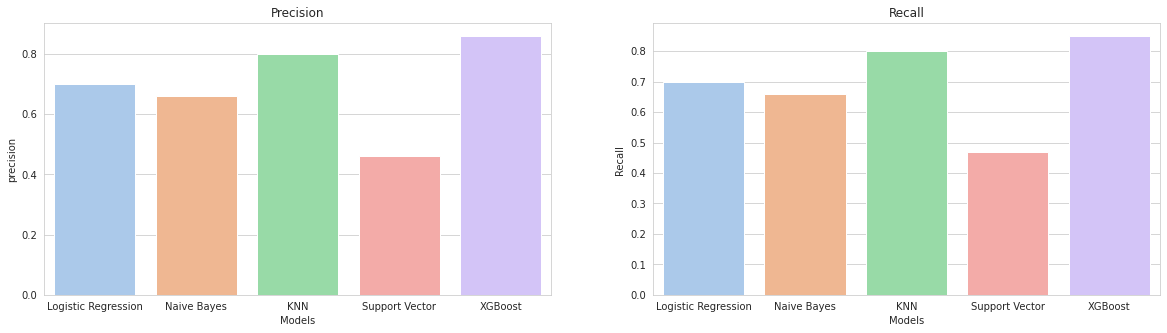

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Logistic Regression', 'Naive Bayes', 'KNN', 'Support Vector', 'XGBoost']
# Pickup by month count
ax1.set_title('Precision')
ax = sns.barplot(x = x_, y='Precision', data = scores, ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('precision')

# Droppoff by month count 
ax = sns.barplot(x = x_, y='Recall',  data = scores, ax = ax2)
ax2.set_title('Recall')
ax.set_xlabel('Models')
ax.set_ylabel('Recall ')
plt.show()

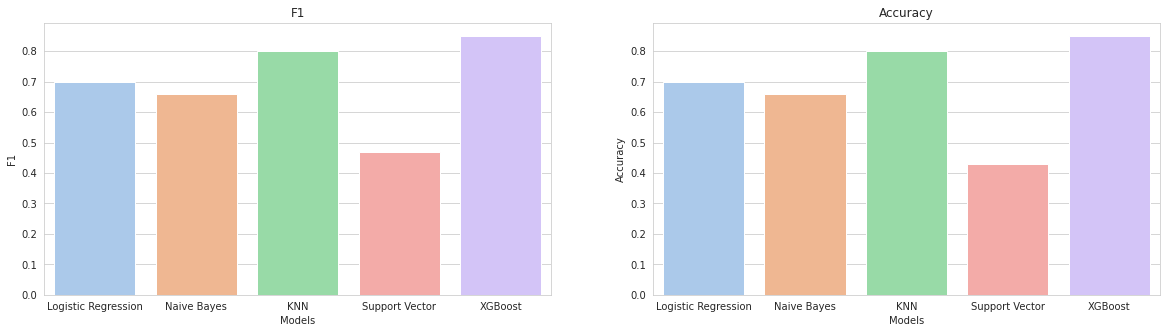

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Logistic Regression', 'Naive Bayes', 'KNN', 'Support Vector', 'XGBoost']
# Pickup by month count
ax1.set_title('F1')
ax = sns.barplot(x = x_, y='F1', data = scores, ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('F1')

# Droppoff by month count 
ax = sns.barplot(x = x_, y='Accuracy',  data = scores, ax = ax2)
ax2.set_title('Accuracy')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()